I found this dataset on https://www.kaggle.com/adityakadiwal/water-potability. The objective of the task was to assess the safety of drinking water based on 9 characteristics (pH value, Hardness, Solids (Total dissolved solids - TDS), Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, and Turbidity) to see if the water is safe for human consumption. The last columns Potability indicates if its safe as 1 means Potable and 0 means Not potable. 
Below in the table of contents you will find the steps I'll take to preform EDA, culstering analysis and run multiple classifying algorithms and see which one has the highest accuracy. 

In [1]:
# Table of content 

## 1. Import libraries
## 2. Import dataset
## 3. EDA 
   # A. Check for missing values and shape of dataset
   # B. Repalce missing value with mean value
   # C. Check corrlation
   # D. Check data type for each column 
   # E. Preform basic statistical analysis
## 4. Visualize Data
## 5. K-Mean Cluster Analysis
## 6. Classification Algorithms (K Neighbors Classifier, Random Forest Classifier, 
##                               Logistic Regression, and Decision Tree Classifier)


In [2]:
# 1. import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# 2. import dataset
waterq = pd.read_csv('water_potability.csv')
waterq.head(7)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0


## EDA

In [4]:
# check for missing values and shape of dataset
print(waterq.isnull().sum())
print(waterq.shape)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
(3276, 10)


In [5]:
# repalce missing value with mean value 
waterq['Sulfate'].fillna(float(waterq['Sulfate'].mean()), inplace=True)
waterq['Trihalomethanes'].fillna(float(waterq['Trihalomethanes'].mean()), inplace=True)
waterq['ph'].fillna(float(waterq['ph'].mean()), inplace=True)

In [6]:
# recheck missing values
waterq.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

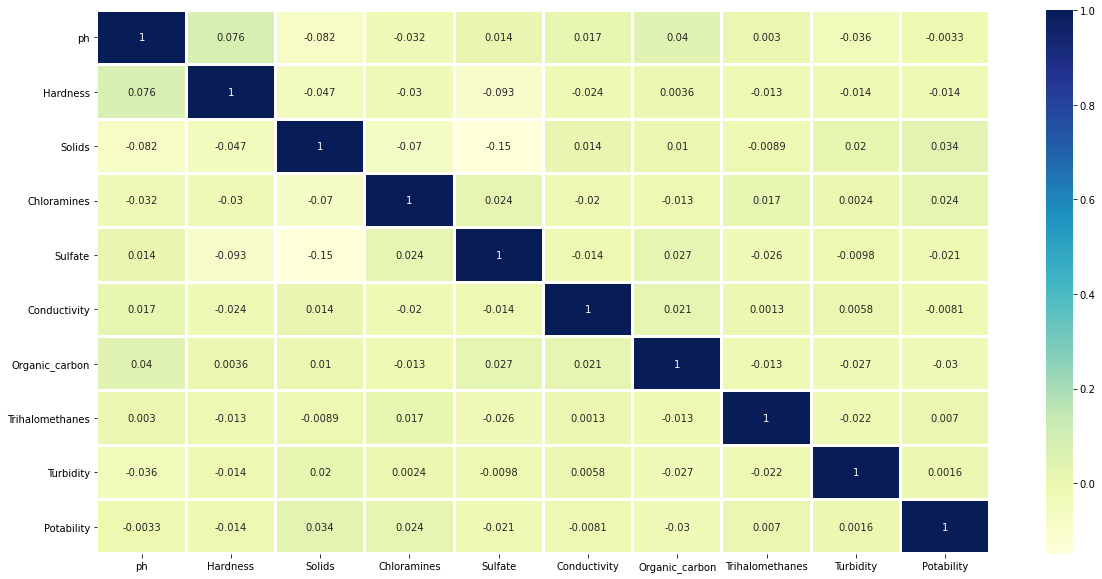

In [7]:
# plot corrlation using heatmap 
plt.figure(figsize=(20,10))
sns.heatmap(waterq.corr(),annot= True, cmap = 'YlGnBu', linewidths=2)

In [8]:
# check data type
waterq.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [9]:
# basic statistical analysis
waterq.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
print('Potability/water quality ')
waterq.Potability.value_counts()

Potability/water quality 


0    1998
1    1278
Name: Potability, dtype: int64

## Visualize Data

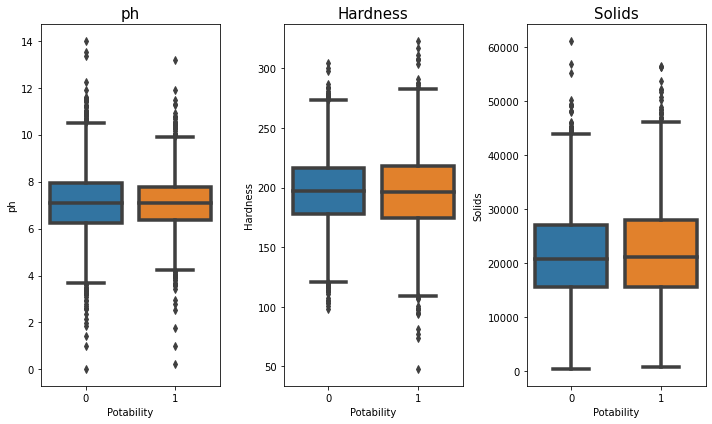

In [11]:
# boxplot for first 3 columns 
fig = plt.figure(figsize=(10,6))
for index,column in enumerate(list(waterq.columns[:3])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = waterq.loc[:, column], x = waterq["Potability"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

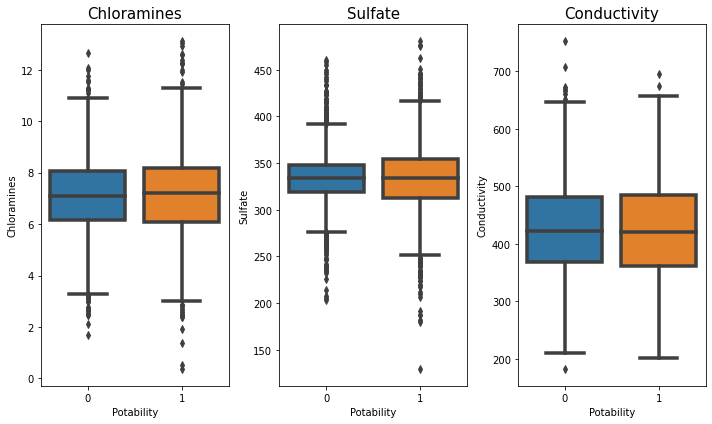

In [12]:
# boxplot for next 3 columns 
fig = plt.figure(figsize=(10,6))
for index,column in enumerate(list(waterq.columns[3:6])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = waterq.loc[:, column], x = waterq["Potability"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

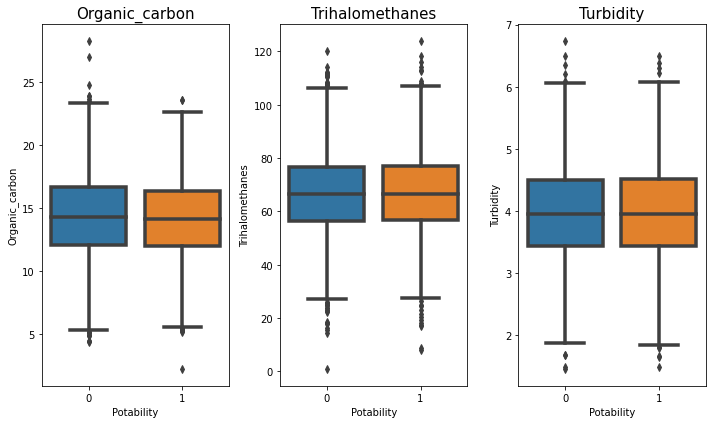

In [13]:
# boxplot for next 3 columns 
fig = plt.figure(figsize=(10,6))
for index,column in enumerate(list(waterq.columns[6:9])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = waterq.loc[:, column], x = waterq["Potability"], linewidth=3.5)
    plt.title(column, size = 15)
fig.tight_layout()

In [14]:
#scale all features except Potability column 
x = waterq.drop('Potability', axis=1).values
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = waterq['Potability'].values

#split data to train and test subsets
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=.20, random_state=1)

## Clustering Analysis

In [15]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X)
waterq['Cluster_Groups'] = y_pred
waterq.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Cluster_Groups
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,1
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0


Cluster group number count:
0    1852
1    1424
Name: Cluster_Groups, dtype: int64


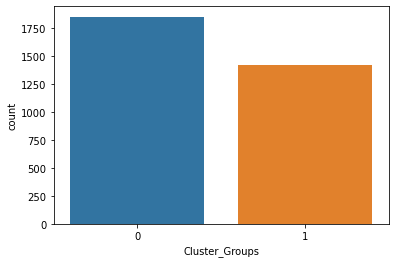

In [16]:

sns.countplot(waterq["Cluster_Groups"])
print('Cluster group number count:')
print(waterq.Cluster_Groups.value_counts())

In [17]:
# find mean values of all cloumns for each cluster 
cgm = waterq.groupby('Cluster_Groups').mean().drop('Potability', axis=1)
cgm

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Cluster_Groups,,,,,,,,,
0,7.428275,199.789538,17238.516757,7.384245,345.273641,415.519645,13.901686,68.021520,3.834855
1,6.628875,191.921520,28225.023934,6.781571,318.822094,440.102219,14.783455,64.282585,4.138371


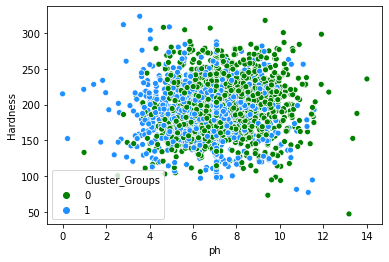

In [18]:
sns.scatterplot(x = 'ph', y = 'Hardness', hue = "Cluster_Groups",
                data = waterq, alpha = 1,palette=['green', 'dodgerblue',])

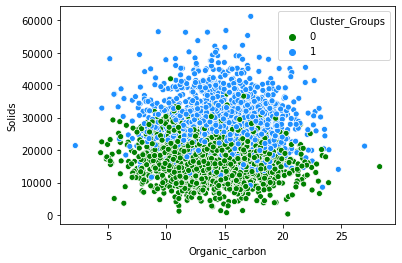

In [19]:
sns.scatterplot(x = 'Organic_carbon', y = 'Solids', hue = "Cluster_Groups",
                data = waterq, alpha = 1,palette=['green', 'dodgerblue',])

## Algorithms to be used for Classification 
K Neighbors Classifier

Random Forest Classifier

Logistic Regression

Decision Tree Classifier

## K Neighbors Classifier 

In [20]:
#finding the best score and its corresponding k parameters 
knn = KNeighborsClassifier()
p_g = {'n_neighbors': range(1,50)}
knngs = GridSearchCV(knn, p_g, cv=5)
knngs.fit(train_x,train_y)
print(knngs.best_params_)
print(knngs.best_score_)

{'n_neighbors': 23}
0.6534351145038169


## Random Forest Classifier 

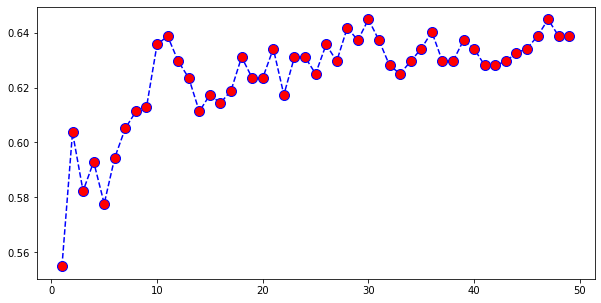

In [21]:
# finding optimal n_estimators value using graph 
n_estimators = []
for i in range(1,50):
    RF2 = RandomForestClassifier(n_estimators = i, random_state=1)
    RF2.fit(train_x, train_y)
    rfpred = RF2.predict(test_x)
    n_estimators.append(accuracy_score(test_y, rfpred))
plt.figure(figsize=(10,5))
plt.plot(range(1,50),n_estimators,color ='blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

In [22]:
# optimal n_estimators find is 30 now create object for RandomForestClassifier and fit model 
n_estimators = 30
RF2 = RandomForestClassifier(n_estimators, random_state=1)
RF2.fit(train_x, train_y)
rfpred2 = RF2.predict(test_x)

In [23]:
# Evaluation
print('Accuracy Score:', accuracy_score(test_y, rfpred2))
print(classification_report(test_y, rfpred2))
print('Confusion Matrix')
print(confusion_matrix(test_y, rfpred2))

Accuracy Score: 0.6448170731707317
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       373
           1       0.68      0.34      0.45       283

    accuracy                           0.64       656
   macro avg       0.66      0.61      0.59       656
weighted avg       0.65      0.64      0.61       656

Confusion Matrix
[[328  45]
 [188  95]]


## Logistic Regression 

In [24]:
# create LogisticRegression object, then create param grid
# train model using train subset
# then find best parameters and score 
LR = LogisticRegression()
param_gridLR = [{'C' : np.logspace(-4, 4, 20),'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']}]
knngs = GridSearchCV(LR, param_gridLR, cv=5)
knngs.fit(train_x,train_y)
print(knngs.best_params_)
print(knngs.best_score_)

{'C': 0.03359818286283781, 'solver': 'liblinear'}
0.6209923664122137


## Decision Tree Classifier

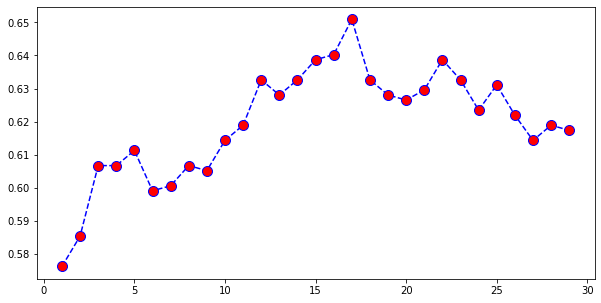

In [25]:
# finding optimal max_depth value using graph 
max_depth = []
for i in range(1,30):
    waterTree = DecisionTreeClassifier(max_depth=i, random_state=5)
    waterTree.fit(train_x, train_y)
    wpredTree = waterTree.predict(test_x)
    max_depth.append(accuracy_score(test_y, wpredTree))
plt.figure(figsize=(10,5))
plt.plot(range(1,30),max_depth,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

In [27]:
# optimal max_depth found is 17 now create object for DecisionTreeClassifier, 
# train model and create prediction object on test_x (test subset)
# then # Evaluation
waterTree2 = DecisionTreeClassifier(max_depth = 17, random_state=5)
waterTree2.fit(train_x,train_y)
predTree2 = waterTree2.predict(test_x)
print('Accuracy Score:', accuracy_score(test_y, predTree2))

Accuracy Score: 0.6509146341463414


#### K Neighbors Classifier, with n_neighbors set to 23  preduce an accuracy of (0.6534351145038169) x 100 = 65.114%. The highest among all the different algorithms ran above and their given parameters 